# Введення в роботу з бібліотекою Requests

## Вступ
Багато веб-програм використовують `API` для підключення до різних сторонніх сервісів. Використовуючи `AP`I, ви можете отримувати доступ до таких даних як інформація про погоду, результати спортивних змагань, рейтинги фільмів, твіти, результати пошуку в пошукових системах та зображення. Також ви можете використовувати API для додавання функціоналу до вашої програми, наприклад платежів, планування, відправки повідомлень електронної пошти, перекладів, карт і передачі файлів. Самостійне створення таких інструментів може зайняти дуже багато часу, а `API` дозволяють за лічені хвилини підключитися до джерела та отримати доступ до його функцій та даних.

З цієї статті ви дізнаєтесь про бібліотеку Python `Requests`, яка дозволяє надсилати запити `HTTP` з Python.

Оскільки при використанні `API` надсилаються запити `HTTP` та виходять відповіді, бібліотека `Requests` відкриває можливість використання `API` у Python. Ми продемонструємо використання `API` для мовного перекладу, щоб побачити, як це працює.

## Короткий огляд запитів `HTTP`
Запити `HTTP` є основою всесвітньої мережі. Щоразу, коли ви відкриваєте веб-сторінку, ваш браузер надсилає безліч запитів на сервер цієї веб-сторінки. Сервер відповідає на них, надсилаючи всі необхідні дані для виведення сторінки, і ваш браузер відображає сторінку, щоб ви могли побачити її.

Загалом цей процес виглядає так: клієнт (наприклад, браузер або скрипт Python, що використовує бібліотеку `Requests`) відправляє дані на `URL`, а сервер з цим `URL` зчитує дані, вирішує, що з ними робити, і надсилає клієнту відповідь. Після цього клієнт може вирішити, що робити з отриманими у відповіді даними.

У складі запиту клієнт надсилає дані за методом запиту. Найбільш поширеними методами запиту є `GET`, `POST` та `PUT`. Запити `GET` зазвичай призначені лише читання даних без їх зміни, а запити `POST` і `PUT` зазвичай призначаються зміни даних на сервері. Наприклад, Stripe `API` дозволяє використовувати запити `POST` для тарифікації, щоб користувач міг купити щось у вашому додатку.
>Примітка. У цій статті розповідається про запити `GET`, оскільки ми не маємо наміру змінювати жодні дані на сервері.

При надсиланні запиту з скрипту Python або веб-програми ви як розробник вирішуєте, що надсилати в кожному запиті і що робити з отриманими відповідями. Для початку відправимо запит на [Scotch.io](http://scotch.io/) та використовуємо `API` для перекладу.

## Встановлення Python `Requests`
Перш ніж ми можемо щось зробити, нам потрібно встановити бібліотеку. Так що спочатку ми встановимо бібліотеку `Requests` за допомогою pip. Якщо ви ще не створили віртуального середовища, варто зробити це зараз.

```Python
!pip install requests # pip install requests - якщо інсталювати з терміналу
```

## Наш перший запит
Спочатку ми використовуємо бібліотеку `Requests` для відправки запиту на сайт Scotch.io. Створіть файл з ім'ям `script.py` та додайте до нього наступний код. У цій статті ми розглядаємо невелику кількість коду, тому, якщо щось зміниться, ви можете просто оновити існуючий код замість додавання нових рядків.

In [1]:
import requests

res = requests.get('https://scotch.io')

print(res)

<Response [200]>


Цей код просто надсилає запит `GET` на сайт Scotch.io. Це такий самий тип запиту, який використовується вашим браузером для перегляду цієї сторінки, і єдина відмінність полягає в тому, що бібліотека `Requests` не може виконати рендеринг коду `HTML`, і тому ви отримаєте просто код HTML та іншу інформацію, що міститься у відповіді.

Тут ми використовуємо функцію `.get()`, проте `Requests` також дозволяє використовувати при надсиланні запитів та інші функції, у тому числі `.post()` та `.put()`.

Щоб надіслати запит, потрібно запустити файл `script.py`.

## Коди стану
Насамперед ми перевіримо код стану. Коди `HTTP` знаходяться в діапазоні від `1XX` до `5XX`. Напевно, ви вже знайомі з кодами стану `200`, `404` і `500`.

Далі ми наведемо короткий огляд значень кодів стану:

`1XX` — інформація  
`2XX` - успішно  
`3XX` - перенапрямок  
`4XX` - помилка клієнта (помилка на вашому боці)  
`5XX` - помилка сервера (помилка на їхньому боці)  
Зазвичай, при виконанні наших власних запитів ми хочемо отримати коди стану в діапазоні `200`.

Бібліотека `Requests` розуміє, що коди стану `4XX` та `5XX` сигналізують про помилки, і тому при поверненні цих кодів стану об'єкту відповіді на запит надається значення `False`.

Перевіривши істинність відповіді, можна переконатися, що запит успішно оброблений. Наприклад:

In [2]:
if res:
    print('Response OK')
else:
    print('Response Failed')

Response OK


Повідомлення _Response Failed_ з'явиться тільки при поверненні коду стану `400` або `500`. Спробуйте замінити `URL`-адресу на неіснуючий, щоб побачити помилку відповіді `404`.

Щоб переглянути код стану, додайте наступний рядок:

In [3]:
print(res.status_code)

200


## Заголовки
Також у відповіді можна отримати заголовки. Ви можете подивитися їх за допомогою словника `headers` для об'єкту `response`.

In [4]:
print(res.headers)

{'Date': 'Tue, 11 Oct 2022 05:34:33 GMT', 'Content-Type': 'text/html', 'Transfer-Encoding': 'chunked', 'Connection': 'keep-alive', 'last-modified': 'Thu, 29 Sep 2022 19:12:11 GMT', 'etag': 'W/"6335ee0b-30d95"', 'expires': 'Tue, 11 Oct 2022 05:30:00 GMT', 'cache-control': 'max-age=0, public, max-age=0, s-maxage=300, must-revalidate', 'x-frame-options': 'DENY', 'x-xss-protection': '1; mode=block', 'CF-Cache-Status': 'HIT', 'Age': '272', 'Vary': 'Accept-Encoding', 'Server': 'cloudflare', 'CF-RAY': '75853a327c6b77b3-KBP', 'Content-Encoding': 'gzip'}


Заголовки надсилаються разом із запитом та повертаються з відповіддю. Заголовки використовуються для того, щоб клієнт і сервер розуміли, як інтерпретувати дані, що надсилаються та одержуються у запиті та відповіді.

Ми побачимо у відповіді кілька заголовків. Зазвичай інформація із заголовків не потрібна, проте, якщо вона вам потрібна, ви можете її отримати.

Зазвичай потрібний заголовок `content type`, оскільки він показує формат даних, наприклад `HTML`, `JSON`, `PDF`, звичайний текст і т. д. Однак заголовок `content type` обробляється бібліотекою `Requests`, і ви маєте доступ до всіх даних, що повертаються.

## Текст відповіді
Якщо ми подивимося на файл `res.text` (це працює для текстових даних, таких як сторінка `HTML`), ми побачимо весь код `HTML`, необхідний для побудови домашньої сторінки Scotch. Рендеринг не виконуватиметься, але ми побачимо, що він належить Scotch. Якщо ви збережете цей код у файл і відкриєте його, ви побачите щось подібне до сайту Scotch. В реальних умовах для завантаження на одну веб-сторінку зображень, скриптів, таблиць стилів і т. д. надсилається кілька запитів, так що якщо ви збережете у файл тільки `HTML` код і відкриєте його в браузері, результат не буде схожий на сторінку Scotch.io , оскільки для отримання даних `HTML` було надіслано лише один запит.

In [5]:
print(res.text)

<!DOCTYPE html><html lang="en" dir="ltr"><head><meta charSet="utf-8"/><link rel="apple-touch-icon" sizes="180x180" href="/_next/static/media/apple-touch-icon.d7edaa01.png"/><link rel="icon" sizes="192x192" href="/_next/static/media/android-chrome-192x192.f09059d8.png"/><link rel="icon" sizes="512x512" href="/_next/static/media/android-chrome-512x512.5f2e6221.png"/><link rel="icon" type="image/png" sizes="32x32" href="/_next/static/media/favicon-32x32.b7ef9ede.png"/><link rel="icon" type="image/png" sizes="16x16" href="/_next/static/media/favicon-16x16.71c34517.png"/><link rel="icon" type="image/x-icon" href="/_next/static/media/favicon.594d6067.ico"/><meta name="viewport" content="minimum-scale=1, initial-scale=1, width=device-width, shrink-to-fit=no"/><meta name="twitter:card" content="summary"/><meta name="twitter:title" content="DigitalOcean"/><meta name="twitter:image" content="https://www.digitalocean.com/_next/static/media/social-share-default.e8530e9e.jpeg"/><meta property="og:t

## Використання Translate API
Тепер перейдемо до чогось цікавішого. Ми використовуємо `API Яндекс`.Переклад (Yandex Translate API) для виконання запиту на переклад тексту іншою мовою.

Щоб використовувати `API`, потрібно попередньо увійти до системи. Після входу в систему перейдіть до `Translate API` та створіть ключ `API`. Коли у вас буде ключ `API`, додайте його до свого файлу як константу. Далі наведено посилання, за допомогою якого ви можете зробити все: https://tech.yandex.com/translate/

In [8]:
API_KEY = 'your yandex api key'

Ключ `API` потрібен, щоб Яндекс міг проводити аутентифікацію щоразу, коли ми хочемо використовувати його `API`. Ключ `API` є полегшеною формою аутентифікації, оскільки він додається в кінці `URL` запиту при відправці.

Щоб дізнатися, яку `URL` нам потрібно надіслати для використання API, подивимося документацію Яндекса.

Там ми знайдемо всю інформацію, необхідну для використання їх `Translate API` для перекладу тексту.

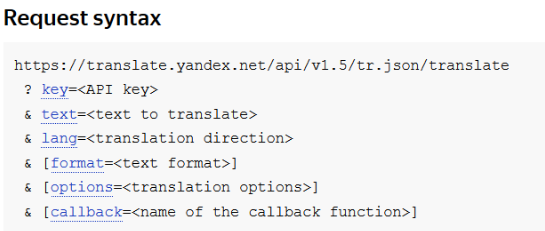

https://translate.yandex.net/api/vl.5/tr.json/translate<br>
& key=`<API key>`<br>
& text=`<text to translate>`<br>
& lang=`<translation direction>`<br>
& [format=`<text format>]`<br>
& [options=`<translation options>`]<br>
& [callback=`<name of the callback function>`]<br>

Якщо ви бачите `URL` із символами амперсанда (`&`), знаками питання (`?`) або знаками рівності (`=`), ви можете бути впевнені, що це `URL`-адреса запиту `GET`. Ці символи визначають параметри для `URL`-адреси.

Зазвичай усе, що розміщено у квадратних дужках ([]), буде необов'язковим. У разі для запиту необов'язкові формат, опції і зворотний, але обов'язкові параметри `key`, `text` і `lang`.

Додамо код для надсилання на цю `URL`-адресу. Замініть перший створений нами запит на наступний:

```Python
url = 'https://translate.yandex.net/api/v1.5/tr.json/translate'
res = requests.get(url)
```

Існує два способи додавання параметрів. Ми можемо прямо додати параметри до кінця `URL`, або бібліотека `Requests` може зробити це за нас. Для останнього потрібно створити словник параметрів. Нам потрібно вказати три елементи: `ключ`, `текст` та `мову`. Створимо словник, використовуючи ключ `API`, текст `Hello` та мову `en-es`, тому що нам потрібний переклад з англійської на іспанську.

Інші коди мов можна переглянути тут. Нам потрібний стовпець `639-1`.

Ми створюємо словник параметрів, використовуючи функцію `dict()`, та передаємо ключі та значення, які хочемо використовувати у нашому словнику.

In [9]:
params = dict(key=API_KEY, text='Hello', lang='en-es')

Тепер візьмемо словник параметрів та передамо його функції `.get()`.

res = requests.get(url, params=params)

In [12]:
# print(res.text)

Когда мы передаем параметры таким образом, `Requests` автоматически добавляет параметры в `URL` за нас.

Теперь добавим команду печати текста ответа и посмотрим, что мы получим в результате.

Ми бачимо три речі. Ми бачимо код стану, який збігається з кодом стану відповіді, ми бачимо задану мову і ми бачимо перекладений текст усередині списку. Отже, ми маємо побачити перекладений текст Hola.

Повторіть процедуру з кодом мови `en-fr`, і ви отримаєте відповідь `Bonjour`.

params = dict(key=API_KEY, text='Hello', lang='en-fr')

Подивимося заголовки отриманої відповіді.

print(res.headers)

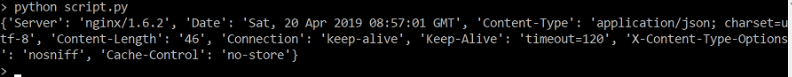

Зрозуміло, заголовки повинні бути іншими, оскільки ми взаємодіємо з іншим сервером, але в даному випадку бачимо тип контенту `application/json` замість `text/html`. Це означає, що ці дані можна інтерпретувати у форматі `JSON`.

Якщо відповідь має тип контенту application/json, бібліотека Requests може конвертувати його у словник та список, щоб нам було зручніше переглядати дані.

Для обробки даних у форматі JSON ми використовуємо метод .json() на об'єкті response.

Якщо ви роздрукуєте його, ви побачите ті самі дані, але в трохи іншому форматі.

json = res.json()

print(json)

{'code': 200, 'lang': 'en-fr', text': ['Bonjour']}

Причина відмінності полягає в тому, що це не звичайний текст, який ми отримуємо з файлу `res.text`. У разі це друкована версія словника.

Допустимо, нам потрібно отримати доступ до тексту. Оскільки це словник, ми можемо використовувати ключ тексту.
```Python
print(json['text'])
```

Тепер ми бачимо дані лише цього ключа. У цьому випадку ми бачимо список з одного елемента, тому якщо ми захочемо безпосередньо отримати текст у списку, ми можемо використовувати покажчик для доступу до нього.

Тепер ми бачимо лише перекладене слово.

Зрозуміло, якщо змінимо параметри, ми отримаємо інші результати. Змінимо текст, що перекладається з Hello на Goodbye, змінимо мову перекладу на іспанську і знову відправимо запит.
```Python
params = dict(key=API_KEY, text='Goodbye', lang='en-es')
```
Приклади помилок `Translate API`
На закінчення розглянемо приклад помилки. Іноді щось не працює, і потрібно знати, що робити у подібних випадках.

Спробуйте змінити ключ `API`, видаляючи один символ. Тепер ключ `API` буде недійсним. Спробуйте надіслати запит.

Якщо ви подивите код стану, ви побачите таке: `403`


При використанні `API` потрібно перевіряти, чи був запит успішно виконаний, щоб ви могли обробляти помилки відповідно до вимог вашої програми.

## Висновок
Ми дізналися наступне:

Принципи роботи запитів `HTTP`  
Різні коди стану, які можуть бути у відповіді  
Як надсилати запити та отримувати відповіді за допомогою бібліотеки Python `Requests`  
Як використовувати `API` мовного перекладу для перекладу тексту  
Як конвертувати відповіді у форматі `application/JSON` у словники  
Якщо ви хочете дізнатися більше, перегляньте у цьому [списку](https://apilist.fun/) різні доступні `API` і спробуйте використовувати їх з бібліотекою Python `Requests`.
